# TITANIC SURVIVAL PREDICTION
This is a machine learning project that predicts the survival of passengers on the Titanic based on their characteristics.

## IMPORTING LIBRARIES


In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2, mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## READING DATASET

In [22]:
df=pd.read_csv("Titanic-Dataset.csv",encoding='latin-1')
df.info()
df.head()
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


+ DROPPING LESS IMPORTANT COLUMNS

In [23]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)

## VISUALISING STATISTICS OF DATA

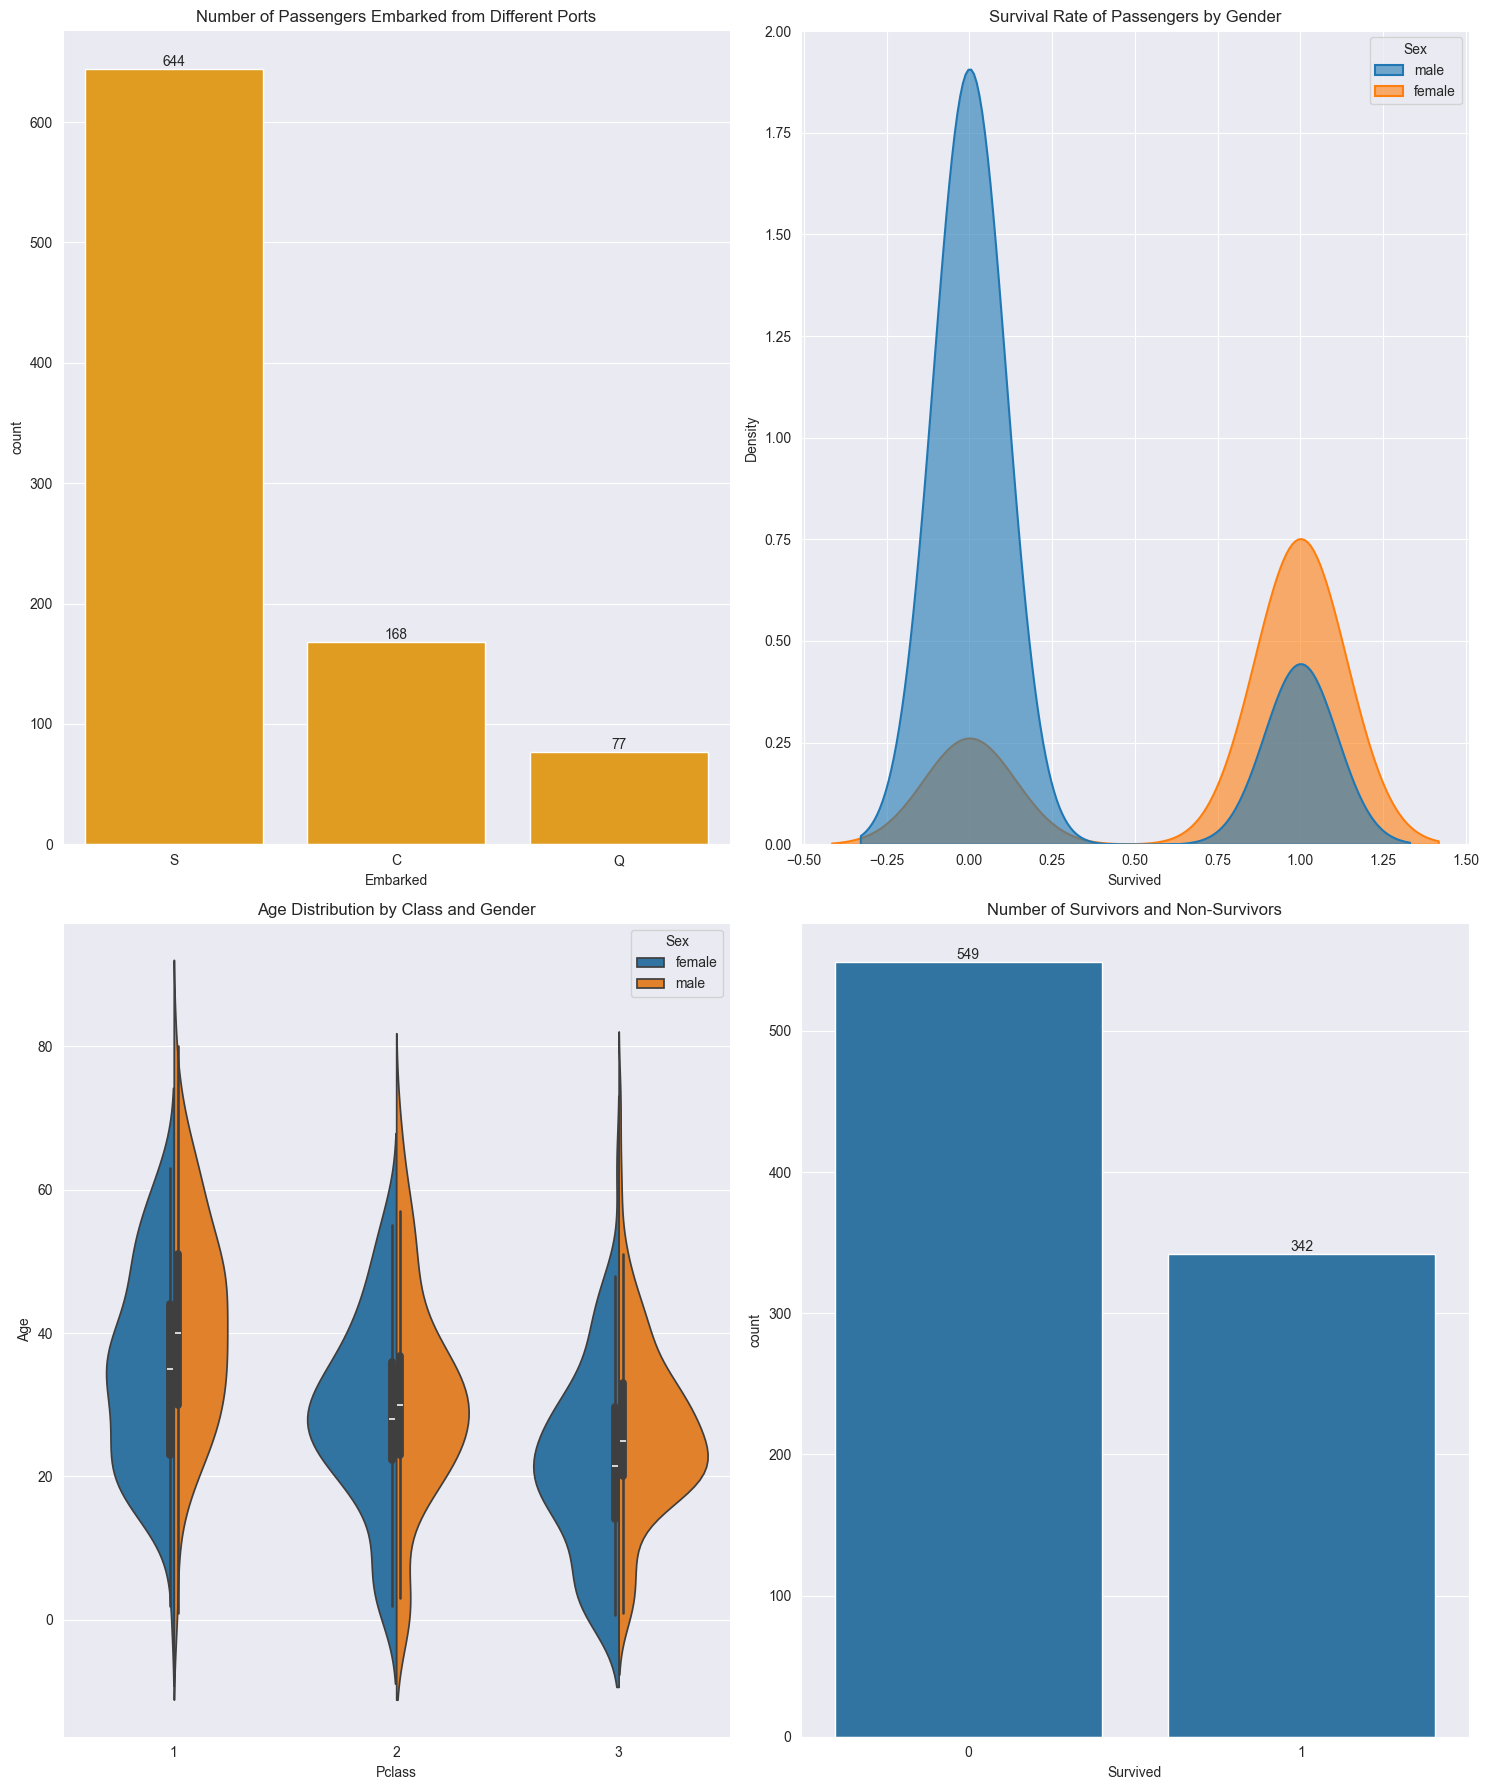

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 18))

bar1=sns.countplot(x='Embarked', data=df, ax=axs[0, 0],color='orange')
axs[0, 0].set_title('Number of Passengers Embarked from Different Ports')
bar1.bar_label(bar1.containers[0])


sns.kdeplot(data=df, x="Survived", hue="Sex", fill=True, alpha=0.6, linewidth=1.5,ax=axs[0,1])
bar3=axs[0, 1].set_title('Survival Rate of Passengers by Gender')


sns.violinplot(x='Pclass', y='Age', hue='Sex', data=df, split=True, ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution by Class and Gender')


bar2=sns.countplot(x='Survived', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Number of Survivors and Non-Survivors')
bar2.bar_label(bar2.containers[0])

plt.tight_layout()
plt.show()


## HANDLING DISCREPANCIES IN DATA

In [25]:
encode=LabelEncoder()
df['Sex']=encode.fit_transform(df['Sex'])
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [26]:
y=df['Embarked'].mode()[0]
df['Embarked'].fillna(value=y, inplace=True)
df['Embarked']=encode.fit_transform(df['Embarked'])
df['Embarked'].value_counts()


Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [27]:
x=df['Age'].mean()
df['Age'].fillna(value=x, inplace=True)
df['Age'].isnull().sum()

0

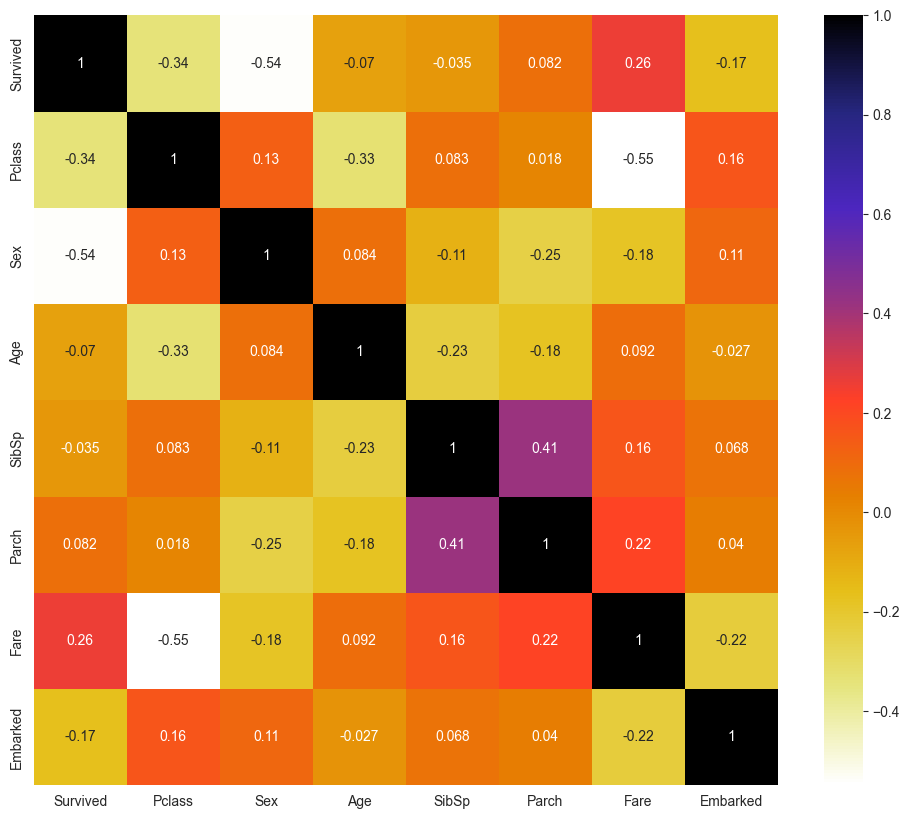

In [28]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## SELECTING BEST FEATURES

In [29]:
X1=df.drop(columns='Survived',axis=1)
Y1=df['Survived']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3)

+ CHI-SQUARED TEST

In [30]:
val=chi2(X1_train,Y1_train)
p_val=pd.Series(val[0])
p_val.index=X1_train.columns
p_val.sort_values(ascending=False)

Fare        2876.812669
Sex           61.954711
Pclass        22.230661
Age           20.756391
Parch         15.029362
Embarked       5.317797
SibSp          0.018281
dtype: float64

In [31]:
val=chi2(X1_train,Y1_train)
p_val=pd.Series(val[1])
p_val.index=X1_train.columns
p_val.sort_values(ascending=True)


Fare        0.000000e+00
Sex         3.514479e-15
Pclass      2.417817e-06
Age         5.215722e-06
Parch       1.058514e-04
Embarked    2.110868e-02
SibSp       8.924485e-01
dtype: float64

+ MUTUAL INFORMATION

Mutual Information: [0.05606555 0.14727078 0.04334639 0.02529437 0.03082409 0.1140013
 0.06215739]


<Axes: >

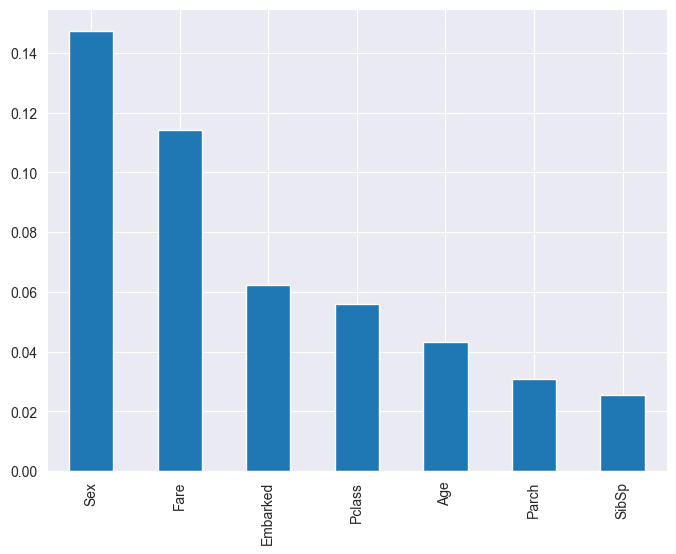

In [60]:
mutual_info=mutual_info_regression(X1_train,Y1_train)
print("Mutual Information:",mutual_info)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X1_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8,6))

## SELECTING BEST FEATURES

In [33]:
x_selected=df[['Sex','Fare','Age','Pclass','Embarked']]
y_target=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x_selected,y_target,test_size=0.3)

## NORMALIZING DATA

In [34]:
scaler = StandardScaler()
normalized_X_train = scaler.fit_transform(x_train)
normalized_X_test = scaler.transform(x_test)

## USING RANDOM FOREST CLASSIFIER ON THE DATASET

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=26)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1,error_score='raise')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

rf_best = grid_search.best_estimator_

y_pred = rf_best.predict(x_test)



Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Best Cross-Validation Score: 0.813771712158809


## CLASSIFICATION REPORT AND CONFUSION MATRIX

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       161
           1       0.84      0.73      0.78       107

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.84      0.84      0.83       268



Text(0.5, 1.0, 'Confusion Matrix')

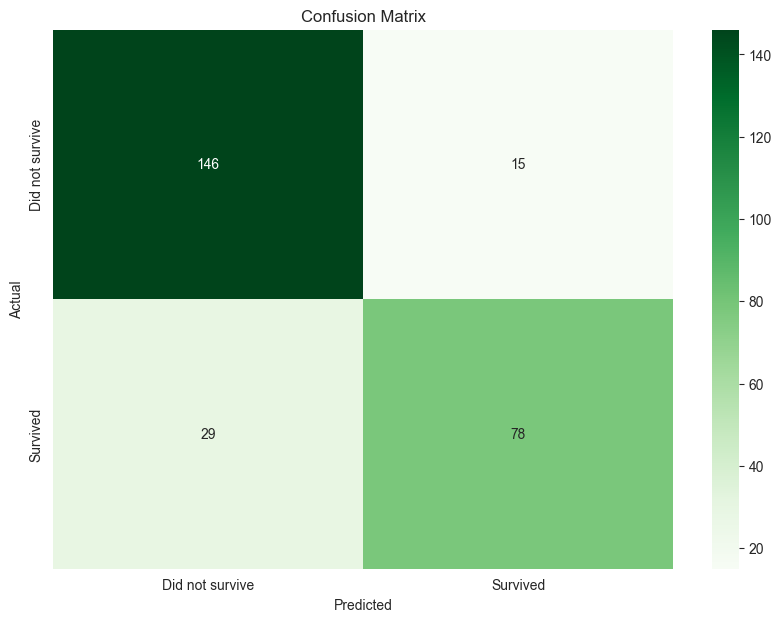

In [36]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy, 2)}')
print('Classification Report:')
print(class_report)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## PREDICTING OVER NEW DATA

In [20]:
'Sex','Fare','Age','Pclass','Embarked'
new_transaction = {
    'Sex': 0,
    'Fare': 1000.0,
    'Age': 20,
    'Pclass': 2,
    'Embarked':1}
new_transaction_df = pd.DataFrame([new_transaction])

new_transaction_pred = rf_best.predict(new_transaction_df)

print(f'Prediction for new transaction: {"Survived" if new_transaction_pred[0] == 1 else "Not Survived"}')

Prediction for new transaction: Survived
